In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline

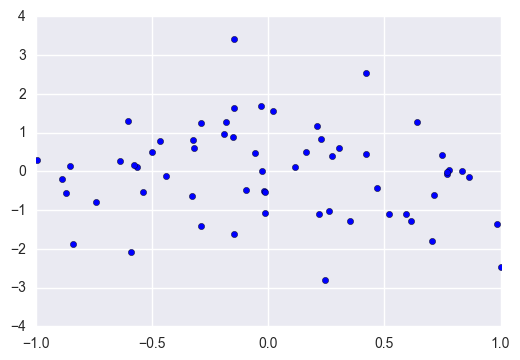

In [11]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
plt.xlim(-1, 1)
#plt.yscale('log')
plt.scatter(x, y)

([<matplotlib.axis.XTick at 0x10fa5dc10>,
 <a list of 10 Text xticklabel objects>)

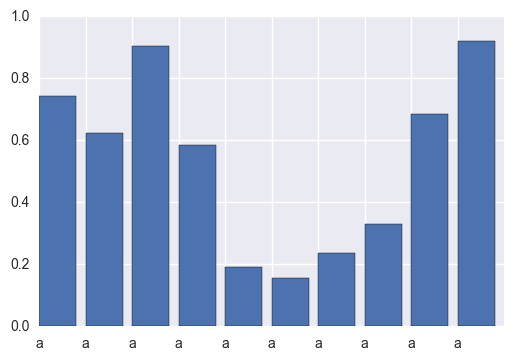

In [15]:
plt.bar(np.arange(10), np.random.rand(10)) # 
plt.xticks(np.arange(10), ['a']*10)

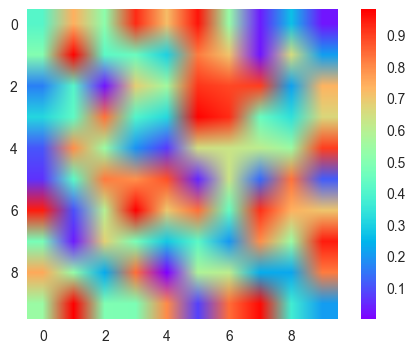

In [23]:
matrix = np.random.rand(10, 10)
plt.imshow(matrix, cmap = 'rainbow') # показываем картинку, чтобы было четко - надо какой-то параметр указать, rainbow - цветное
plt.grid('off')
plt.colorbar() # легенда

In [29]:
A = pd.DataFrame({'C1': np.random.rand(10), 'C2': np.random.rand(10)}, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']) # создадим рандомный DF
A

,C1,C2
a,0.971260,0.407877
b,0.037844,0.208785
c,0.839754,0.860212
d,0.890689,0.327559
e,0.844588,0.968640
f,0.632957,0.962291
g,0.294778,0.142469
h,0.908710,0.067859
i,0.969342,0.666853
j,0.881326,0.146458


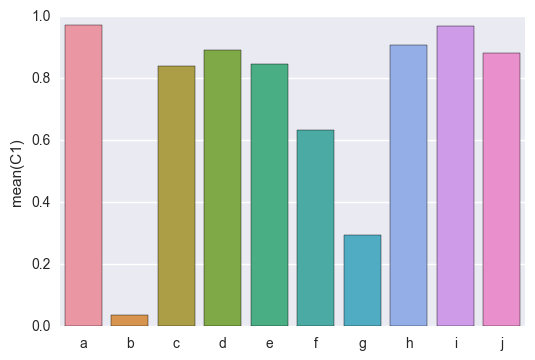

In [30]:
seaborn.barplot(A.index, A['C1']) # seaborn работает с категориальными признаками

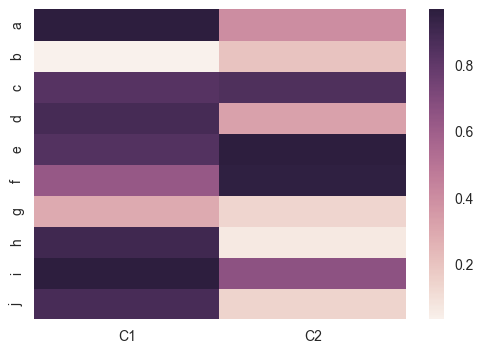

In [32]:
seaborn.heatmap(A) # heatmap - это как imshow, только в seaborn

## Проверка задачи с семинара по функциям потерь

In [42]:
y = np.random.randint(50, size = 15)
C = np.linspace(start = np.min(y) - 1, stop = np.max(y) + 1, num = 1000)

In [43]:
err = np.abs(y - C[0]).mean()
err

array([ 22.,  12.,   1.,  45.,   5.,  15.,   2.,  25.,  15.,   4.,  17.,
        35.,  34.,  30.,  10.])

Как теперь сделать так, чтобы мы вычли из игрека весь вектор С

In [48]:
 y[:, np.newaxis] - C[np.newaxis, ] # получили матрицу ij-ый элемент y_i - c_j. То есть в j-ом столбцу содержатся нужные разницы

array([[ 22.        ,  21.95395395,  21.90790791, ..., -23.90790791,
        -23.95395395, -24.        ],
       [ 12.        ,  11.95395395,  11.90790791, ..., -33.90790791,
        -33.95395395, -34.        ],
       [  1.        ,   0.95395395,   0.90790791, ..., -44.90790791,
        -44.95395395, -45.        ],
       ..., 
       [ 34.        ,  33.95395395,  33.90790791, ..., -11.90790791,
        -11.95395395, -12.        ],
       [ 30.        ,  29.95395395,  29.90790791, ..., -15.90790791,
        -15.95395395, -16.        ],
       [ 10.        ,   9.95395395,   9.90790791, ..., -35.90790791,
        -35.95395395, -36.        ]])

In [51]:
err = np.abs( y[:, np.newaxis] - C[np.newaxis, ] ).mean(axis = 0) # взяли матрицу из предыд строки по модулю, взяли среднее по столбцам
err.shape

(1000,)

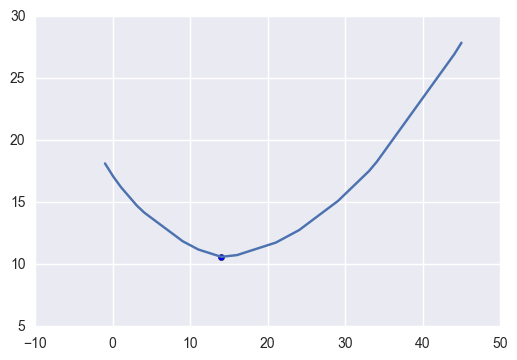

In [57]:
m = np.median(y)
plt.plot(C, err) # строим функцию, зависящую от C
plt.scatter([m], [np.abs(y - m).mean()]) # ставит точку
#plt.xlim([10, 20]) #если увеличить хотим
#plt.ylim([10, 12.5])
#проверем, что в минимум попали (это задача MAE)
plt.subplot(1, 2, 2) # 1- 1 строка, 2 - число столбцов, 2 - номер графика, которым сейчас занимаемся


## Sklearn

In [67]:
class Counter:
    def __init__(self, start = 0): # по умолчанию 0, если ничего не передаем
        self.i = start
        self.__X = 2 # private variable
    def add(self, value, ret = False):
        self.i += value
        if ret:
            return self.i
    def show(self):
        print(self.i)
    def __smth__(self): # private function
        print "I do nothof"

In [68]:
counter = Counter(12)
counter.show()
print(counter.add(3))
print(counter.add(3, ret=True))
counter.show()
print counter.i

12
None
18
18
18


In [77]:
class AdvancedCounter(Counter):
    def __init__(self, start = 0, mult_start = 1):
        super(AdvancedCounter, self).__init__(start)
        self.mult_i = mult_start
    def mult(self, value):
        self.mult_i *= value
    def show(self):
        print(self.i, self.mult_i)
        

In [78]:
ac = AdvancedCounter(start = 12, mult_start = 3)

TypeError: super() argument 1 must be type, not classobj

### Sklearn
- Датасеты - самые поплуярные
- предобработка
- работы с признаками
- метрики (в виде функций)
- методы обучения (в формате класс)

model_validation: как разбивать выборку на test и train
model_selection.hyper-parametr optimizers - Gridsearch
